# Indian Elections 2024 Ad Campaigns Analysis

In [65]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv("advertisers.csv")

In [5]:
df1.head()

,Page_ID,Page_name,Disclaimer,Amount_spent(INR),Number_of_ads_in_Library
0,1.214400e+14,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,3.516160e+14,Indian National Congress,Indian National Congress,108787100,846
2,1.327150e+14,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,1.928560e+14,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,1.094700e+14,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [6]:
df1.rename(columns={'Amount_spent(INR)': 'Amount_spent', 'Number_of_ads_in_Library': 'Number_of_ads'}, inplace=True)
df1['Amount_spent'] = pd.to_numeric(df1['Amount_spent'], errors='coerce')
top_df1 = df1.sort_values(by=['Amount_spent', 'Number_of_ads'], ascending=[False, False]).head(5)

In [7]:
criterion = 'Page_name'
criterion1 = 'Amount_spent'
criterion2 = 'Number_of_ads'

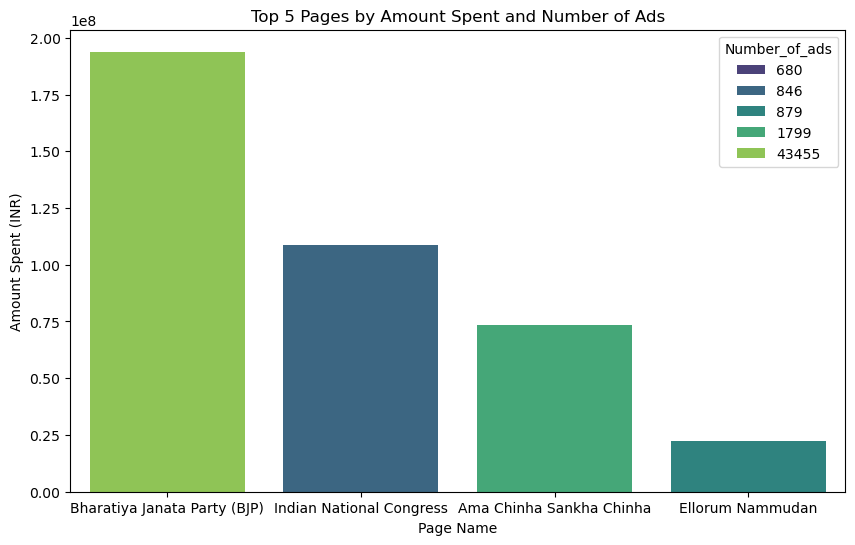

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Page_name', y='Amount_spent', data=top_df1, hue='Number_of_ads', dodge=False, palette='viridis')
plt.title('Top 5 Pages by Amount Spent and Number of Ads')
plt.xlabel('Page Name')
plt.ylabel('Amount Spent (INR)')
plt.show()

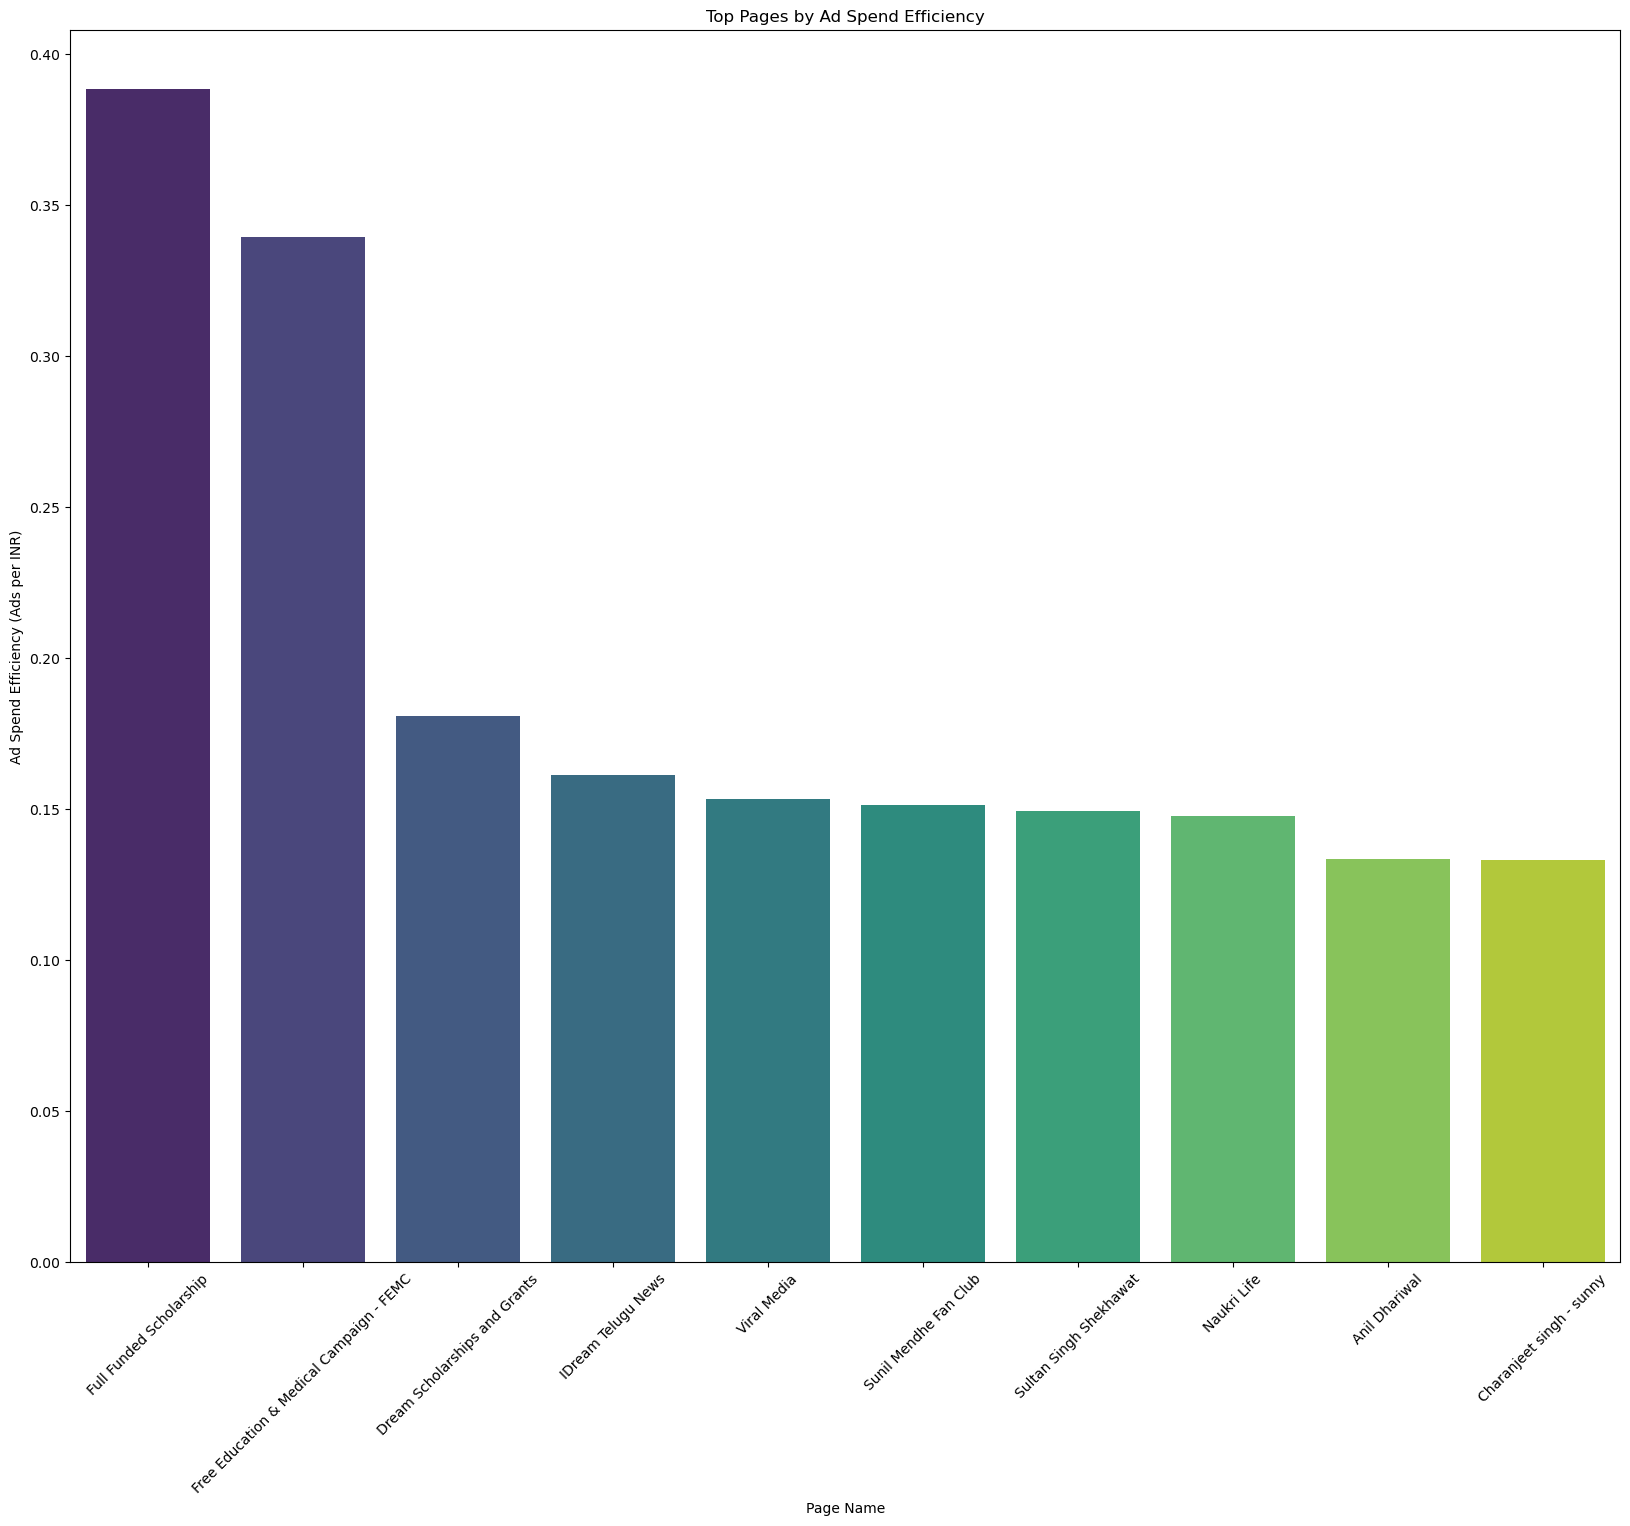

In [56]:
# Calculate ad spend efficiency
df1['Ad_Spend_Efficiency'] = df1['Number_of_ads'] / df1['Amount_spent']

# Plot the top pages by ad spend efficiency
plt.figure(figsize=(20, 16))
sns.barplot(x='Page_name', y='Ad_Spend_Efficiency', data=df1.sort_values(by='Ad_Spend_Efficiency', ascending=False).head(10), palette='viridis')
plt.title('Top Pages by Ad Spend Efficiency')
plt.xlabel('Page Name')
plt.ylabel('Ad Spend Efficiency (Ads per INR)')
plt.xticks(rotation=45)
plt.show()


In [17]:
df2=pd.read_csv("Locations.csv")

In [18]:
df2.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location name       36 non-null     object
 1   Amount spent (INR)  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 708.0+ bytes


In [20]:
df2.rename(columns={'Amount spent (INR)': 'Spent_Amount'}, inplace=True)
df2['Spent_Amount'] = pd.to_numeric(df2['Spent_Amount'], errors='coerce')
top_df2 = df2.sort_values(by='Spent_Amount', ascending=False).head(5)

In [21]:
c_riterion = 'Location name'
c_riterion1 = 'Spent_Amount'

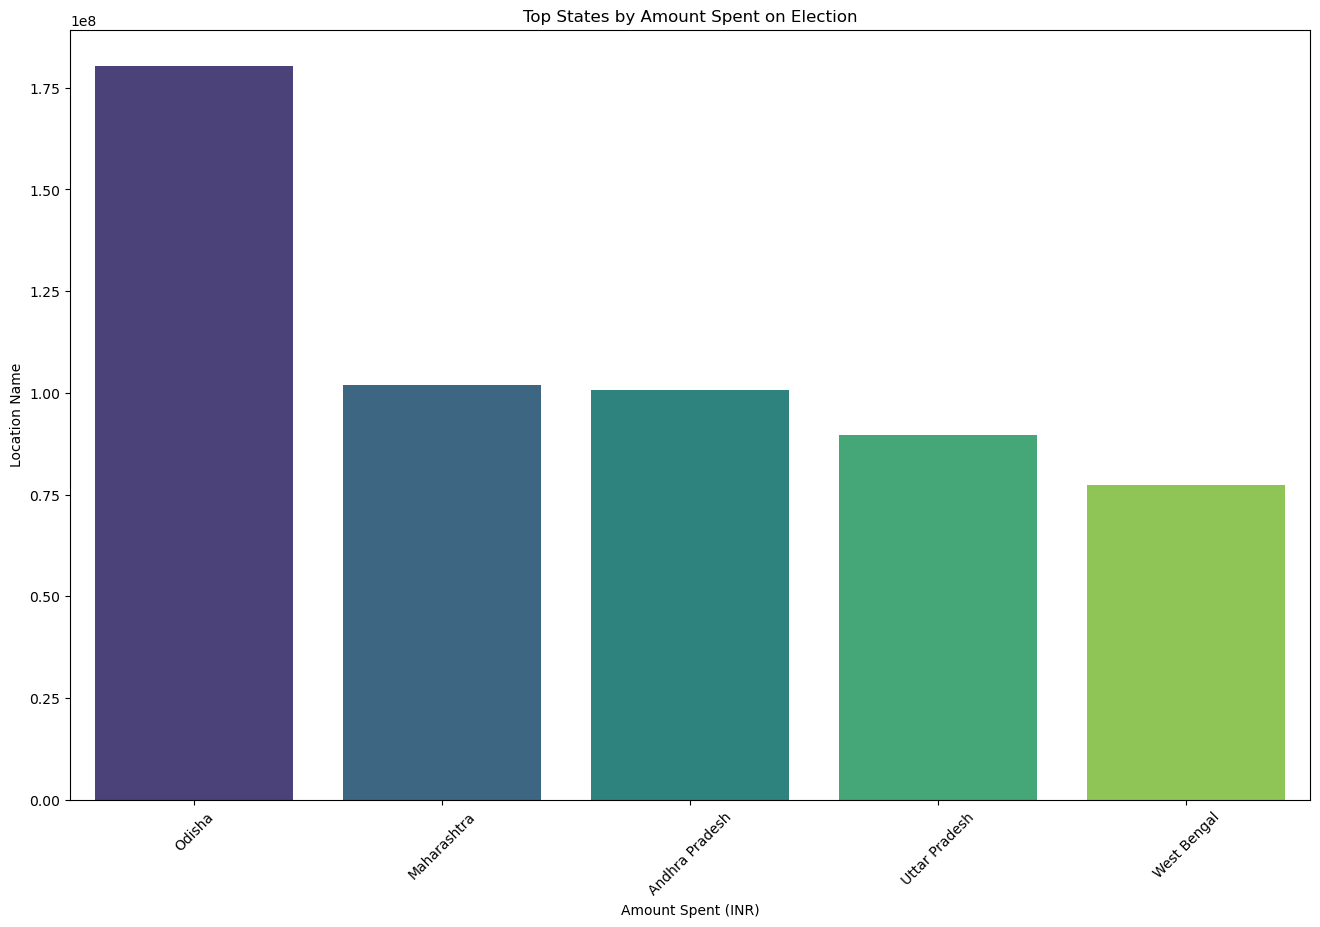

In [59]:
# Plotting the top states by amount spent
plt.figure(figsize=(16, 10))
sns.barplot(x='Location name', y='Spent_Amount', data=top_df2, dodge=False, palette='viridis')
plt.title('Top States by Amount Spent on Election')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Location Name')
plt.xticks(rotation=45)
plt.show()


In [25]:
bottom_df2 = df2.sort_values(by=['Spent_Amount'], ascending=[False]).tail(5)

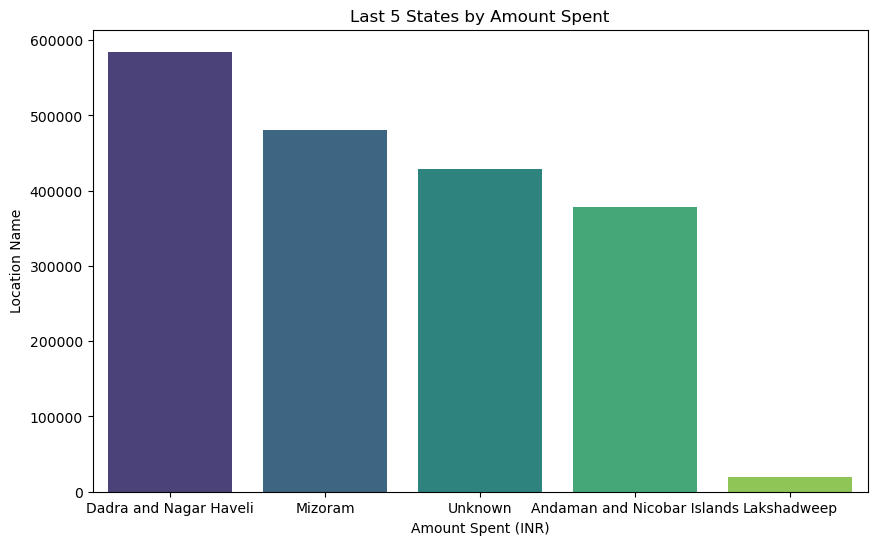

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=c_riterion, y=c_riterion1, data=bottom_df2, dodge=False, palette='viridis')
# Customize the plot
plt.title('Last 5 States by Amount Spent')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Location Name')

# Show the plot
plt.show()

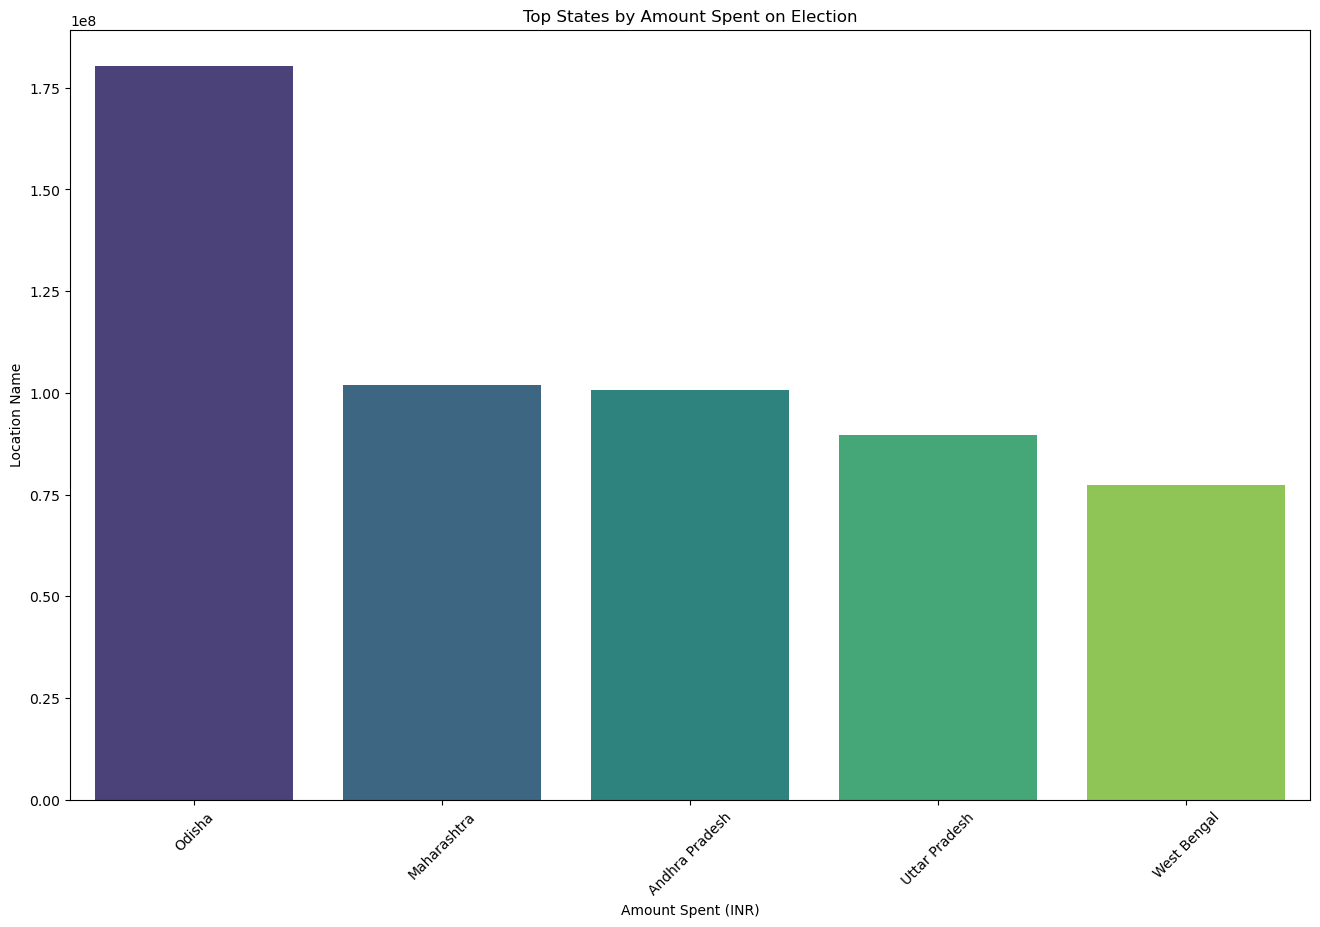

In [31]:
df3=pd.read_csv("results.csv")

In [32]:
df3.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [33]:
# Calculate state-wise total voters
state_wise_total_voters = df3.groupby('State')['Total Electors'].sum().reset_index()

# Rename the column for clarity
state_wise_total_voters.rename(columns={'Total Electors': 'State_Wise_Total_Voters'}, inplace=True)


# Merge state-wise totals back to the original DataFrame
df3 = df3.merge(state_wise_total_voters, on='State', how='left')


In [34]:
df3.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,State_Wise_Total_Voters
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,315148.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0,892694.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0,892694.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0,24506236.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0,24506236.0


In [35]:
df3['Polled (%)'] = pd.to_numeric(df3['Polled (%)'], errors='coerce')

In [36]:
# Sort and filter data for the top 5 states with the highest percentage of voter turnout
top_states = df3.groupby('State')['Polled (%)'].mean().sort_values(ascending=False).head(5).reset_index()

# Sort and filter data for the top 5 PC with the most number of voters
top_pcs = df3.groupby('PC_Name')['Total Votes'].sum().sort_values(ascending=False).head(5).reset_index()

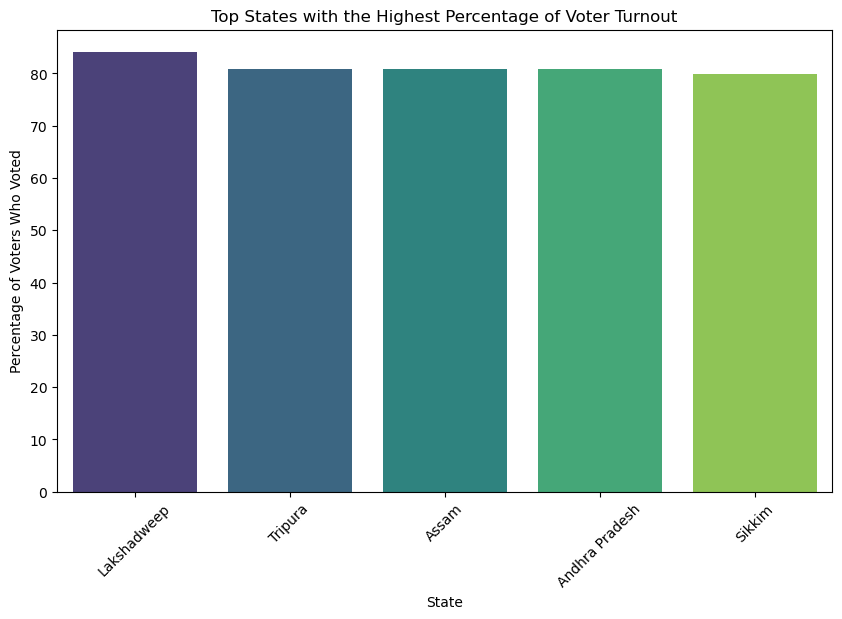

In [61]:
# Plotting the top states with the highest percentage of voter turnout
plt.figure(figsize=(10, 6))
sns.barplot(y='Polled (%)', x='State', data=top_states, palette='viridis')
plt.title('Top States with the Highest Percentage of Voter Turnout')
plt.xlabel('State')
plt.ylabel('Percentage of Voters Who Voted')
plt.xticks(rotation=45)
plt.show()


In [38]:
votes_by_phase = df3.groupby('Phase')['Total Votes'].sum().reset_index()

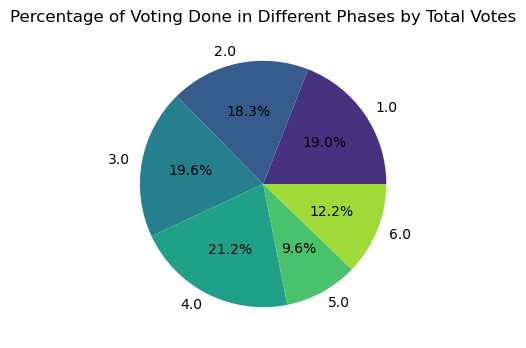

In [64]:
# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(votes_by_phase['Total Votes'], labels=votes_by_phase['Phase'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(votes_by_phase)))
plt.title('Percentage of Voting Done in Different Phases by Total Votes')
plt.show()

In [48]:
merged_df['State'] = merged_df['State'].astype(str)


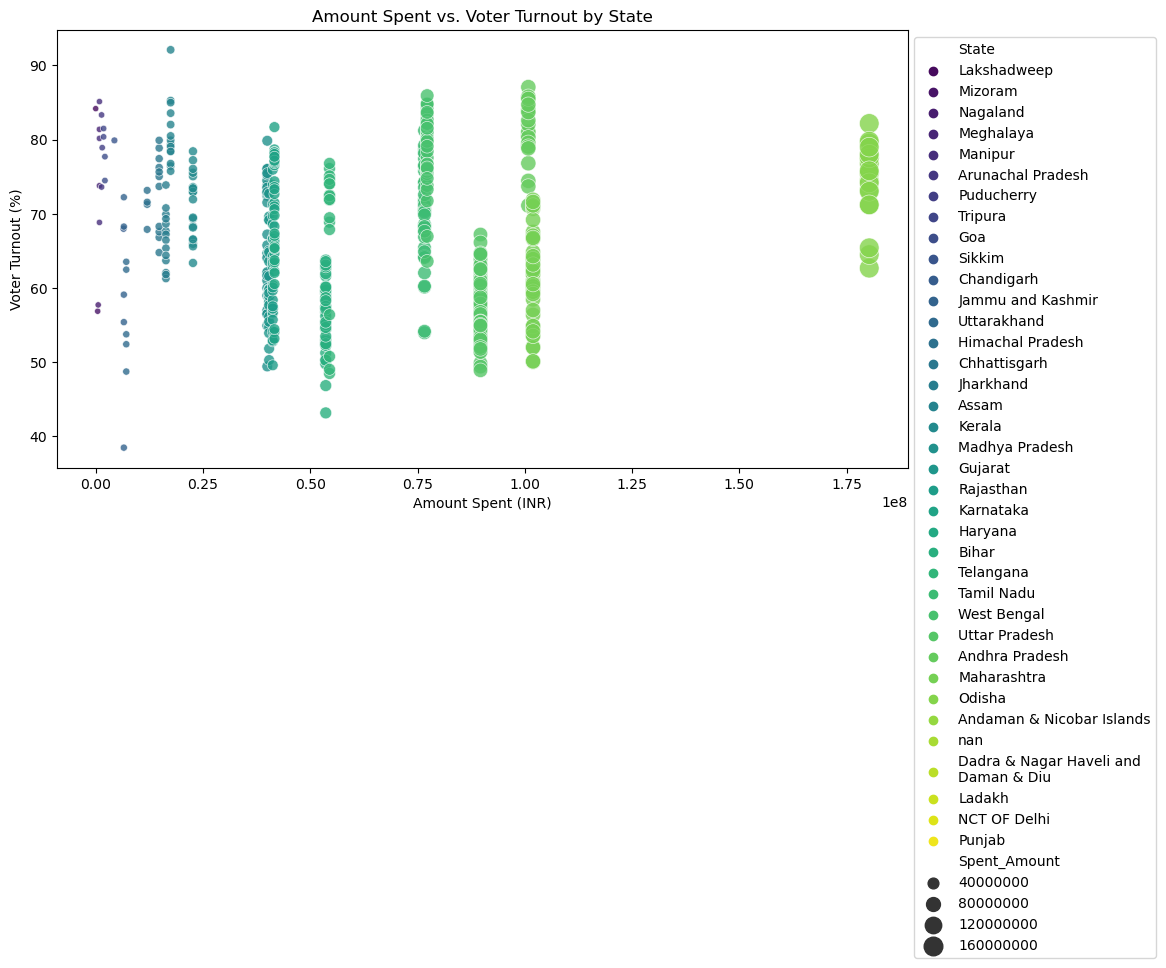

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Spent_Amount', y='Polled (%)', size='Spent_Amount', sizes=(20, 200), hue='State', data=merged_df, palette='viridis', alpha=0.8)
plt.title('Amount Spent vs. Voter Turnout by State')
plt.xlabel('Amount Spent (INR)')
plt.ylabel('Voter Turnout (%)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()
